In [1]:
# hide
from nbdev.showdoc import *

# NumerFrame tutorial and custom TensorFlow Generator example

This tutorial introduces core functionality of `NumerFrame` and how to build a custom TensorFlow DataGenerator using the `NumerFrame`. This application is a good example of how `NumerFrame` can make it easier to implement Numerai specific applications.

In [2]:
from nbdev import show_doc
from numerai_blocks.numerframe import create_numerframe, NumerFrame
from numerai_blocks.download import NumeraiClassicDownloader

First, we download validation data using `NumeraiClassicDownloader`.

In [3]:
downloader = NumeraiClassicDownloader("numerframe_edu")
# Path variables
val_file = "numerai_validation_data.parquet"
val_save_path = f"{str(downloader.dir)}/{val_file}"
# Download only validation parquet file
downloader.download_single_dataset(val_file,
                                   dest_path=val_save_path)

No existing directory found at 'numerframe_edu'. Creating directory...

📁 Downloading 'numerai_validation_data.parquet' 📁

2022-02-11 13:49:19,854 INFO numerapi.utils: starting download
numerframe_edu/numerai_validation_data.parquet: 228MB [00:46, 4.94MB/s]                            


Loading in data and initializing a `NumerFrame` takes one line of code. It will automatically recognize the data format such as `.csv` or `.parquet`. You have the option to add metadata, which is stored in the `meta` attribute.

In [4]:
# Initialize NumerFrame from parquet file path
dataf = create_numerframe(val_save_path, metadata={"version": 2, "type": "validation"})

In [5]:
dataf.meta

{'era_col': 'era',
 'era_col_verified': True,
 'version': 2,
 'type': 'validation'}

Metadata can be exported to or imported from a `.json` file.

In [6]:
dataf.export_json_metadata(file="metadata.json")

📁 Exporting metadata to metadata.json 📁

In [7]:
dataf.import_json_metadata(file="metadata.json", verbose=True)

📁 Importing metadata from metadata.json 📁

{'era_col': 'era', 'era_col_verified': True, 'version': 2, 'type': 'validation'}

All features of Pandas DataFrames can still be used in a `NumerFrame`.

In [8]:
dataf.head(2)

,era,data_type,feature_dichasial_hammier_spawner,feature_rheumy_epistemic_prancer,feature_pert_performative_hormuz,feature_hillier_unpitied_theobromine,feature_perigean_bewitching_thruster,feature_renegade_undomestic_milord,feature_koranic_rude_corf,feature_demisable_expiring_millepede,...,target_paul_20,target_paul_60,target_george_20,target_george_60,target_william_20,target_william_60,target_arthur_20,target_arthur_60,target_thomas_20,target_thomas_60
id,,,,,,,,,,,,,,,,,,,,,
n000777698096000,0857,validation,0.50,0.50,0.25,0.25,0.0,0.0,0.00,0.75,...,0.25,0.5,0.25,0.5,0.166667,0.500000,0.166667,0.500000,0.166667,0.5
n0009793a3b91c27,0857,validation,0.75,0.25,0.50,0.75,1.0,0.0,0.25,0.25,...,0.50,0.5,0.50,0.5,0.666667,0.833333,0.666667,0.833333,0.500000,0.5


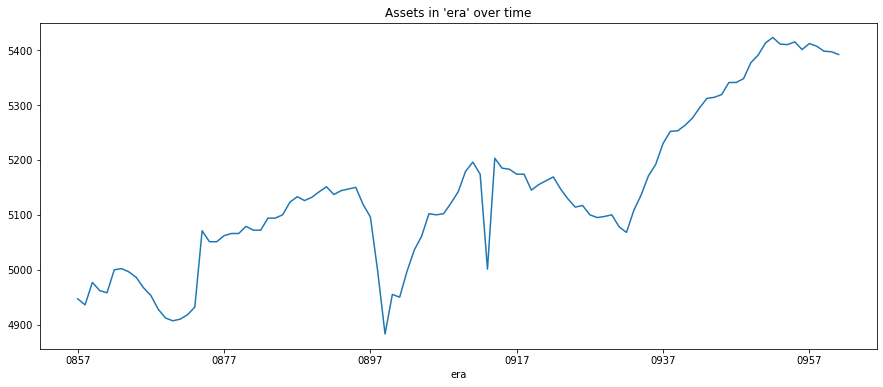

In [9]:
dataf.groupby('era')["target"].size().plot(title="Assets in 'era' over time",
                                           figsize=(15, 6));

NumerFrame extends the Pandas DataFrame with convenient features for working with Numerai data.

For example, the `NumerFrame` groups columns and makes use of the fact that, for Numerai data, all feature column names start with `'feature'`, target columns start with `'target'`, etc. It also keeps track of the era column and parses it automatically for other parts of this library (`'era'` for Numerai Classic and `'friday_date'` for Numerai Signals).

In [10]:
dataf.target_cols[-1]

'target_thomas_60'

In [11]:
dataf.get_single_target_data.head(2)

,target
id,
n000777698096000,0.25
n0009793a3b91c27,0.50


In [12]:
dataf.feature_cols[0]

'feature_dichasial_hammier_spawner'

In [13]:
dataf.get_feature_data.head(2)

,feature_dichasial_hammier_spawner,feature_rheumy_epistemic_prancer,feature_pert_performative_hormuz,feature_hillier_unpitied_theobromine,feature_perigean_bewitching_thruster,feature_renegade_undomestic_milord,feature_koranic_rude_corf,feature_demisable_expiring_millepede,feature_unscheduled_malignant_shingling,feature_clawed_unwept_adaptability,...,feature_unpruned_pedagoguish_inkblot,feature_forworn_hask_haet,feature_drawable_exhortative_dispersant,feature_metabolic_minded_armorist,feature_investigatory_inerasable_circumvallation,feature_centroclinal_incentive_lancelet,feature_unemotional_quietistic_chirper,feature_behaviorist_microbiological_farina,feature_lofty_acceptable_challenge,feature_coactive_prefatorial_lucy
id,,,,,,,,,,,,,,,,,,,,,
n000777698096000,0.50,0.50,0.25,0.25,0.0,0.0,0.00,0.75,1.0,0.25,...,0.0,0.5,0.00,0.0,0.0,0.00,1.00,1.00,0.5,1.00
n0009793a3b91c27,0.75,0.25,0.50,0.75,1.0,0.0,0.25,0.25,1.0,0.25,...,0.5,0.5,0.25,0.5,1.0,0.25,0.75,0.75,0.5,0.75


In [14]:
dataf.prediction_cols

[]

`aux_cols` are all columns that are not a feature, target or prediction column.

In [15]:
dataf.aux_cols

['era', 'data_type']

In [16]:
dataf.get_aux_data.head(2)

,era,data_type
id,,
n000777698096000,0857,validation
n0009793a3b91c27,0857,validation


In [17]:
dataf.get_prediction_data.head(2)

""
id
n000777698096000
n0009793a3b91c27


In [18]:
dataf.meta.era_col

'era'

A split of features and target(s) can be retrieved in 1 line of code.

In [19]:
X, y = dataf.get_feature_target_pair(multi_target=True)

In [20]:
X.head(2)

,feature_dichasial_hammier_spawner,feature_rheumy_epistemic_prancer,feature_pert_performative_hormuz,feature_hillier_unpitied_theobromine,feature_perigean_bewitching_thruster,feature_renegade_undomestic_milord,feature_koranic_rude_corf,feature_demisable_expiring_millepede,feature_unscheduled_malignant_shingling,feature_clawed_unwept_adaptability,...,feature_unpruned_pedagoguish_inkblot,feature_forworn_hask_haet,feature_drawable_exhortative_dispersant,feature_metabolic_minded_armorist,feature_investigatory_inerasable_circumvallation,feature_centroclinal_incentive_lancelet,feature_unemotional_quietistic_chirper,feature_behaviorist_microbiological_farina,feature_lofty_acceptable_challenge,feature_coactive_prefatorial_lucy
id,,,,,,,,,,,,,,,,,,,,,
n000777698096000,0.50,0.50,0.25,0.25,0.0,0.0,0.00,0.75,1.0,0.25,...,0.0,0.5,0.00,0.0,0.0,0.00,1.00,1.00,0.5,1.00
n0009793a3b91c27,0.75,0.25,0.50,0.75,1.0,0.0,0.25,0.25,1.0,0.25,...,0.5,0.5,0.25,0.5,1.0,0.25,0.75,0.75,0.5,0.75


In [21]:
y.head(2)

,target,target_nomi_20,target_nomi_60,target_jerome_20,target_jerome_60,target_janet_20,target_janet_60,target_ben_20,target_ben_60,target_alan_20,...,target_paul_20,target_paul_60,target_george_20,target_george_60,target_william_20,target_william_60,target_arthur_20,target_arthur_60,target_thomas_20,target_thomas_60
id,,,,,,,,,,,,,,,,,,,,,
n000777698096000,0.25,0.25,0.50,0.25,0.50,0.25,0.50,0.25,0.5,0.25,...,0.25,0.5,0.25,0.5,0.166667,0.500000,0.166667,0.500000,0.166667,0.5
n0009793a3b91c27,0.50,0.50,0.75,0.50,0.75,0.50,0.75,0.50,0.5,0.50,...,0.50,0.5,0.50,0.5,0.666667,0.833333,0.666667,0.833333,0.500000,0.5


### Custom TensorFlow generator

To illustrate a practical example, we will build a Tensorflow DataGenerator that returns a batch containing feature and target for 1 or multiple eras. Features and targets columns will be found automatically if not specified.

In [22]:
import numpy as np
import tensorflow as tf
from typing import Tuple

class TFGenerator(tf.keras.utils.Sequence):
    """
    Tensorflow generator for Numerai era batches.
    :param dataf: A NumerFrame
    :param features: Features to select. All by default.
    :param targets: Targets to select. All by default.
    :param n_eras_batch: How many eras per batch.
    :param shuffle: Shuffle eras of not.
    """
    def __init__(self, dataf: NumerFrame,
                 features: list = None,
                 targets: list = None,
                 n_eras_batch=1,
                 shuffle=True):
        self.dataf = dataf
        self.features, self.targets = features, targets
        self.n_eras_batch = n_eras_batch
        self.shuffle = shuffle
        self.eras = dataf[dataf.meta.era_col].unique()
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.eras) / self.n_eras_batch))

    def on_epoch_end(self):
        np.random.shuffle(self.eras) if self.shuffle else ...

    def __getitem__(self, idx: int) -> Tuple[tf.Tensor, tf.Tensor]:
        eras = self.eras[idx:idx+self.n_eras_batch]
        return dataf.get_era_batch(eras=eras,
                                   targets=self.targets,
                                   features=self.features,
                                   convert_to_tf=True
                                   )

Note that `NumerFrame` has its own method for getting batches of eras. It can therefore be implemented with one line for a new generator. If features and targets are not specified it will automatically retrieve all features and targets in the `NumerFrame`.

In [23]:
#hide_input
show_doc(dataf.get_era_batch)

<h4 id="NumerFrame.get_era_batch" class="doc_header"><code>NumerFrame.get_era_batch</code><a href="https://github.com/crowdcent/numerai_blocks/tree/main/numerai_blocks/numerframe.py#L126" class="source_link" style="float:right">[source]</a></h4>

> <code>NumerFrame.get_era_batch</code>(**`eras`**:`List`\[`Any`\], **`convert_to_tf`**=*`False`*, **`aemlp_batch`**=*`False`*, **`features`**:`list`=*`None`*, **`targets`**:`list`=*`None`*, **\*`args`**, **\*\*`kwargs`**)

Get feature target pair batch of 1 or multiple eras.
:param eras: List of era names. They need to be present in era_col.
:param convert_to_tf: Convert to tf.Tensor.
:param aemlp_batch: Specific target batch for autoencoder training.
y will contain three components: features, targets and targets.
:param features: List of features to select. All by default
:param targets: List of targets to select. All by default.
*args, **kwargs are passed to initialization of Tensor.

We can now use this generator for TensorFlow model training, evaluation and inference. This example shows how to get batches of 2 eras each for both nomi targets.

In [24]:
gen = TFGenerator(dataf=dataf, n_eras_batch=2, targets=['target_nomi_20', 'target_nomi_60'])
print(f"Total era batches: {len(gen)}")
X, y = gen[0]

Total era batches: 53


2022-02-11 13:50:10.958110: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
X

<tf.Tensor: shape=(10408, 1050), dtype=float32, numpy=
array([[0.25, 0.25, 0.25, ..., 0.25, 1.  , 0.25],
       [0.75, 0.75, 0.25, ..., 1.  , 0.75, 0.75],
       [0.  , 1.  , 0.  , ..., 0.  , 0.5 , 0.5 ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.75, 0.  ],
       [0.  , 0.  , 0.25, ..., 0.75, 0.75, 1.  ],
       [1.  , 0.5 , 1.  , ..., 0.5 , 0.  , 1.  ]], dtype=float32)>

In [26]:
y

<tf.Tensor: shape=(10408, 2), dtype=float32, numpy=
array([[0.25, 0.  ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       ...,
       [0.75, 0.75],
       [0.5 , 0.5 ],
       [0.5 , 1.  ]], dtype=float32)>

In this tutorial we have created a flexible Tensorflow generator leveraging convenient properties of `NumerFrame`. `NumerFrame` will automatically recognize features, targets and prediction columns, provides tested code for splitting data, has an implementation to get batches of eras and makes sure our era column is correct.

After we are done we can easily clean up our downloaded data with one line of code called from the downloader.

In [27]:
# Clean up environment
downloader.remove_base_directory()

⚠ Deleting directory for 'NumeraiClassicDownloader' ⚠
Path: 
'/Users/clepelaars/Desktop/crowdcent/repositories/numerai-blocks/edu_nbs/numerframe_edu'